# **HR Attrition Project**

# Introduction and Methodology 
Group 10:
- Filipe Brandão Carmo 20240828
- João Silva 20241655
- Rita Marques 20242019
- Sara Henriques 20242070

The objective of this capstone project is to synthesize and apply the diverse skills and knowledge you have acquired throughout your coursework. You will
develop an end-to-end data science solution focused on predicting employee attrition. The project is designed to challenge you to integrate your
understanding of data exploration, feature engineering, machine learning, and model deployment. Additionally, you will refine your ability to communicate
complex results through a polished, professional presentation.

Scenario: 
You are a data scientist tasked with assisting a multinational
consultancy firm in predicting employee attrition. High turnover rates are costly
and disruptive, making it essential for HR to anticipate which employees are
likely to leave.

GitHub Repository: Maintain a well-organized GitHub repository containing all project files, including code, data, documentation, and the slide
deck. Ensure the repository is structured and commented to be understandable by others.

Deliverables:
1. Jupyter Notebook/Python Scripts: Detailed documentation of your entire
workflow, from EDA to modeling and deployment.
2. Final Presentation: A polished, professional presentation with
accompanying slides, ready for a 10-minute delivery.
3. Backup Slides: Additional slides to address potential questions or provide
further details.
4. GitHub Repository: A complete and organized repository with all relevant
files and documentation.

About git to do not forget:

- Includea clear README.md witha projectoverviewandcriticalcomponents
- Providedetailedcommentsanddocstringsin thecode
- Explainhowto runthecode, includingsetupinstructionsandprerequisites
- Define dependenciesin requirements.txt orequivalentfiles
- Organize therepositorywithfolders(e.g. /srcor/docs)
- Use .gitignoreto excludeunnecessaryfiles
- Use meaningfulcommitmessagesandconsistentnamingconventions

# **Part I. The Business Problem**

High turnover rates are costly and disruptive, making it essential for HR to anticipate which employees are likely to leave. We are tasked with assisting a multinational consultancy firm in predicting employee attrition.

The primary goal is to predict whether an employee will leave the company, based on the data provided. Secondary goals include identifying key factors influencing attrition and recommending strategies to retain valuable employees.

The HR department and executive management will be the primary consumers of your insights, and they expect actionable recommendations based on your analysis.

# **Part II - Data Integration**

The dataset provided (HR_DS.csv) contains various attributes related to employee demographics, job satisfaction, work experience, and compensation.

Explore the data types, distribution, and completeness.
Identify any missing values or inconsistencies that need to be addressed.´

Preprocessing:
- Handle missing data through appropriate imputation techniques.
- Encode categorical variables using methods such as one-hot encoding or label encoding, considering the impact on the model.
- Standardize or normalize numerical features if necessary, based on the algorithms you plan to use.

Technologies to be used and Python packages to import:
- Programming & Data Analysis: Python (Pandas, NumPy, Scikit-learn, XGBoost, TensorFlow/PyTorch, etc.)
- Development Environment: VS Code
- Version Control: Git/GitHub
- Model Deployment: Hugging Face Spaces (Optional)
- Data Visualization: Power BI, Plotly, Matplotlib, Seaborn
- Model Interpretation: SHAP, LIME

### **1. Import libraries and dataset**

#### **1.1. Libraries**

In [1]:
import numpy as np ## pip install numpy==2.1 #need this to run ydata-profiling
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency # filter method
from sklearn.preprocessing import MinMaxScaler
from ydata_profiling import ProfileReport 
import matplotlib.pyplot as plt

import sys
#!{sys.executable} -m pip install -U ydata-profiling[notebook]
#!pip install jupyter-contrib-nbextensions
#!jupyter nbextension enable --py widgetsnbextension

#### **1.2. Dataset**

The data for the project consists on a dataset with 1470 lines and 35 columns/ features, provided on CVS format.

In [2]:
# Import dataset, check the .shape() and .info()
HR = pd.read_csv('data/raw/HR_Attrition_Dataset.csv')
print(f"The table has the following format: ", HR.shape)
print(HR.info(max_cols=35))

The table has the following format:  (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470

### **2. High level exploration**

This section presents a data profile report about the different variables across the dataset.

In [3]:
#profile = ProfileReport(HR, title="Profiling Report")
#profile

The dataset is composed with different variables that can be divided in 4 main categories:
1. **Employee demographics** - Age, Distance from Home, Gender, MaritalStatus
2. **Job characteristics** - Department, Business Travel (frequency), Daily Rate, Horly Rate, Montly Rate, Environment Satisfaction (on a scale from 1 to 4 where 1 means low), Job Involvement, Job Level, Job Role, Job Satisfaction, Over time, Relationship Satisfaction with the work, Training Times Last Year, Work life balance
3. **Work experience** - Education, Education Field, Number of Companies Worked, Total of Working Years, Years at the company, Years in the current role, Years since last promotion, Years with th current manager
4. **Compensation** -  MontlyIncome, Percent Salary Hike, Performance Rating, Stock Option Level 

The exploration of the report above quickly indicates that there are features that don't have a significative value for the study, since are constants. It also highlights the low percentage of missing values.

### **3. Set index**

A quick exploration in the dataset allowed to undestand that EmployeeNumber had the potential to be used as index and since those values are unique.

In [3]:
unique_values = HR['EmployeeNumber'].is_unique
print (unique_values)

True


In [5]:
# Added to see the first 5 rows of the dataset with all columns
#pd.set_option('display.max_columns', None)
#HR.head(5)

In [4]:
HR.set_index('EmployeeNumber', inplace = True)
HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


### **4. Check duplicates**

The command below was used to find duplicated lines - any register was found on those conditions.

In [5]:
HR[HR.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,


### **5. Check missing values**

In [6]:
HR.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

The dataset does not contain any variables with missing values, so there is no need for their imputation.

### **6. Remove unvaluable features**

Based on the previous exploration (point 2) where it was found that there are constant features, those features will be removed before deep exploration.

In [7]:
HR_1 = HR.drop(columns=['EmployeeCount', 'StandardHours', 'Over18', 'PerformanceRating'])

### **Result dataframe: HR_1**

# **Part III. Exploratory Data Analysis**

- Univariate Analysis: Conduct a thorough analysis of individual variables to understand their distributions and detect any anomalies or patterns.
- Bivariate and Multivariate Analysis: Examine the relationships between key features, particularly how they correlate with the target variable (Attrition). Utilize heatmaps, pair plots, and correlation matrices to uncover potential multicollinearity issues.
- Visualization: Develop insightful visualizations to communicate findings effectively. Consider using tools like Seaborn or Plotly to create interactive or
complex visualizations.
- Feature Engineering: Assess feature importance using techniques like feature selection or model-based importance scoring (e.g., Random Forest feature importances).

## **1. Info & Shape**

The dataset has a total of 1470 lines and after the first treatment there are now 31 features to explore and work with.

In [8]:
print (HR_1.shape)


(1470, 30)


In [9]:
print (HR_1.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [10]:
pd.set_option('display.max_columns', None)
HR_1.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,2,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,4,1,6,3,3,2,2,2,2


## **2. Univariate data analysis**

### 2.1. Numerical features

In [11]:
# perform .describe() and histograms/variable for univariate data analysis
HR_1.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


To better understand the distribution of the numerical variables in the dataset, we analyze their **skewness** and **kurtosis**.

In [12]:
HR_1.skew(numeric_only=True)

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

DailyRate, EmployeeCount, and HourlyRate skewness values are extremely close to 0, suggesting that these numerical features are **approximately symmetrically distributed**.

JobLevel, MonthlyIncome, NumCompaniesWorked, PerformanceRating, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion are all right-skewed variables.

In [13]:
HR_1.kurt(numeric_only=True)

Age                        -0.404145
DailyRate                  -1.203823
DistanceFromHome           -0.224833
Education                  -0.559115
EnvironmentSatisfaction    -1.202521
HourlyRate                 -1.196398
JobInvolvement              0.270999
JobLevel                    0.399152
JobSatisfaction            -1.222193
MonthlyIncome               1.005233
MonthlyRate                -1.214956
NumCompaniesWorked          0.010214
PercentSalaryHike          -0.300598
RelationshipSatisfaction   -1.184814
StockOptionLevel            0.364634
TotalWorkingYears           0.918270
TrainingTimesLastYear       0.494993
WorkLifeBalance             0.419460
YearsAtCompany              3.935509
YearsInCurrentRole          0.477421
YearsSinceLastPromotion     3.612673
YearsWithCurrManager        0.171058
dtype: float64

Review - All values are negative, indicating that the distributions have lighter tails than a normal distribution (fewer outliers). This confirms that most values cluster around the mean, and extreme values are rare in the numerical features.

### **2.2. Categorical features**

In [14]:
HR_1.select_dtypes(include='object').nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [15]:
HR_1.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


In [16]:
HR_cat = HR_1.select_dtypes(include=['object'])
for col in HR_cat.columns:
  print(HR_cat[col].value_counts(dropna=False, normalize=True), end='\n\n')

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64

Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64

EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64

Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64

JobRole
Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.

**Highlights:**

- Attrition, Gender, and OverTime are binary classes, while the remaining categorical variables are multiclass.

- Some classes are underrepresented such as Human Resources in Job Roles, and Human Resources in Department and Education Field (under 5% representation). 

- Most categorical variables have non-balanced distributions (one class is more represented than the others).

- This analysis indicates that using a Stratified k fold will be necessary to manage imbalances. To avoid leakage the encoding, scaling and feature selection will be performed inside each fold, using the SMOTE for the target variable only to the training split.



## **3. Bivariate data analysis**

Now we shall inspect how the Attrition behaves according to the remaining variables.

### **3.1. Numerical features**

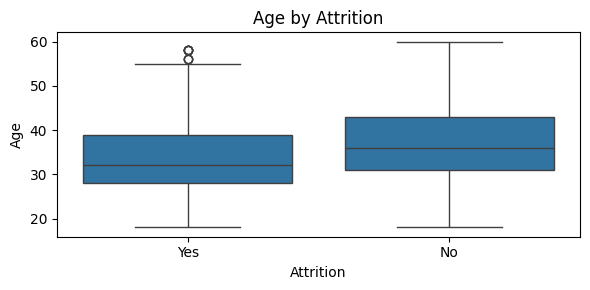

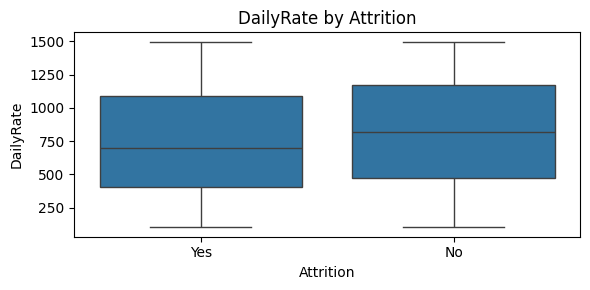

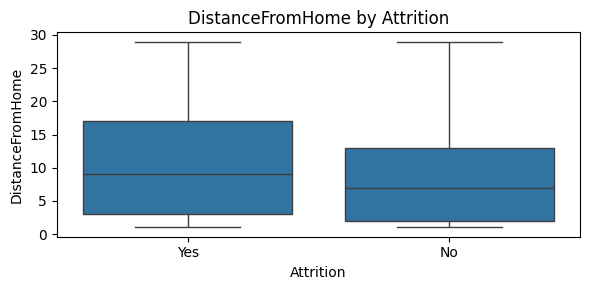

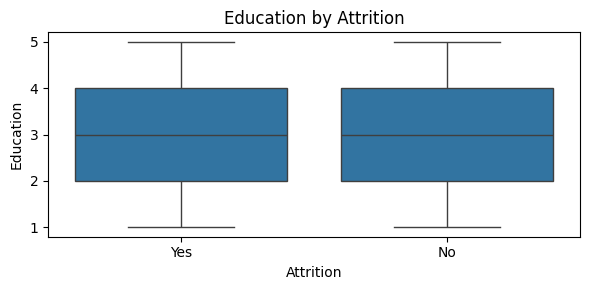

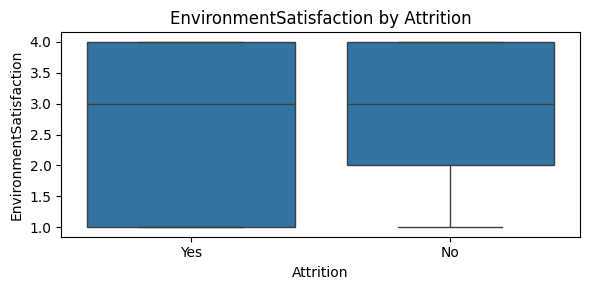

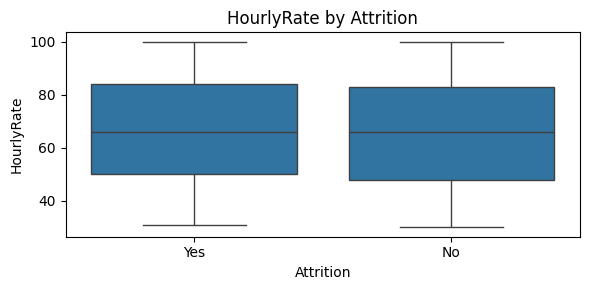

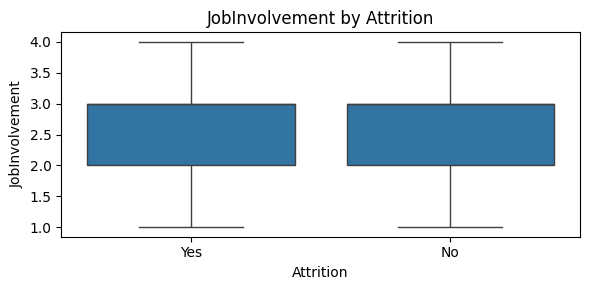

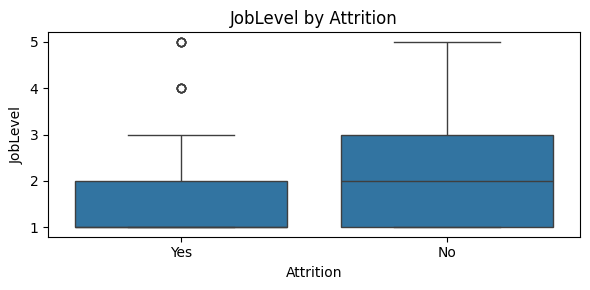

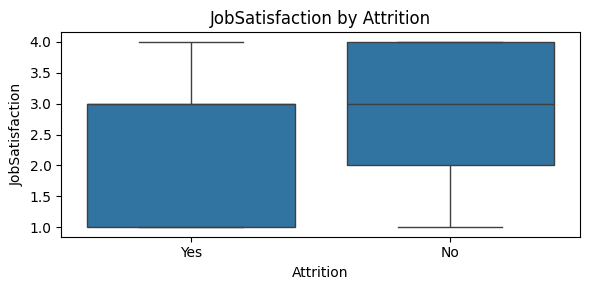

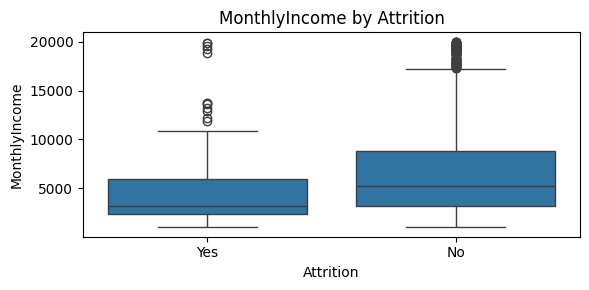

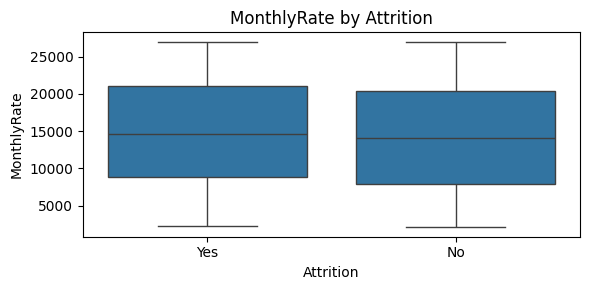

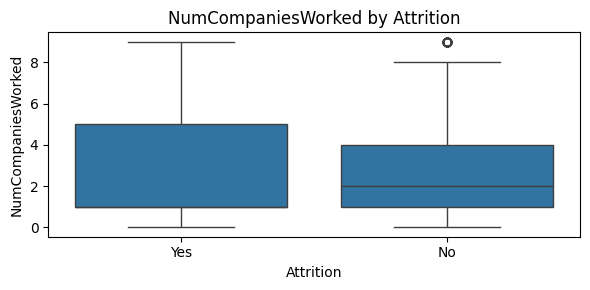

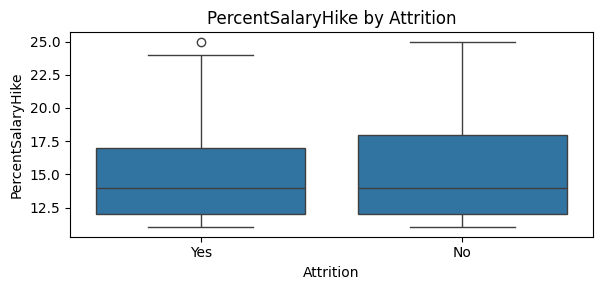

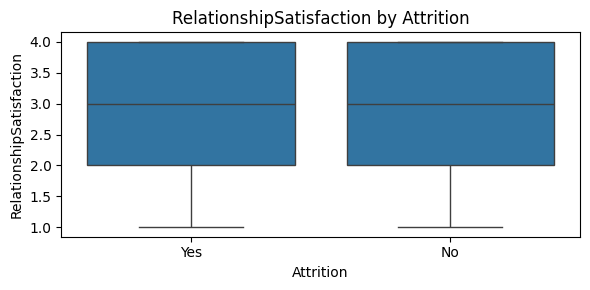

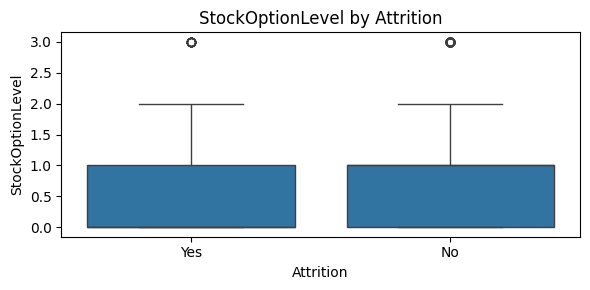

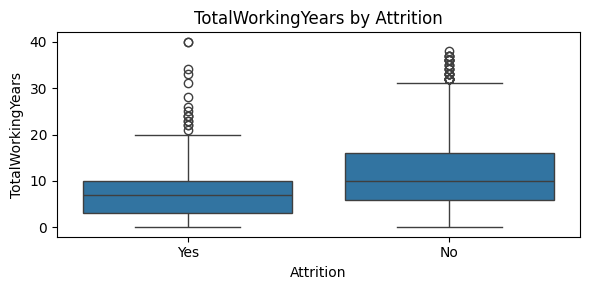

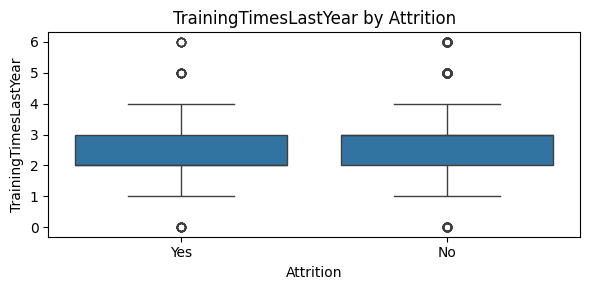

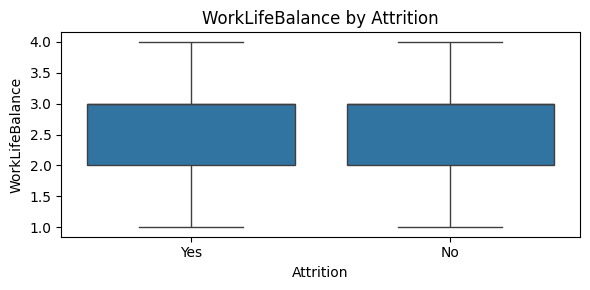

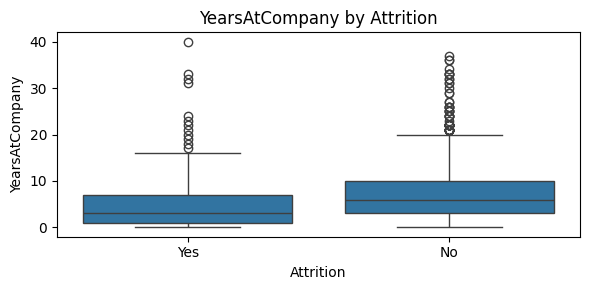

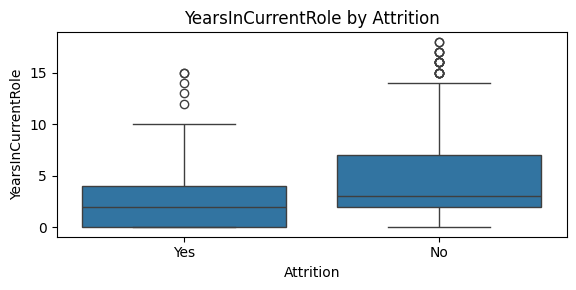

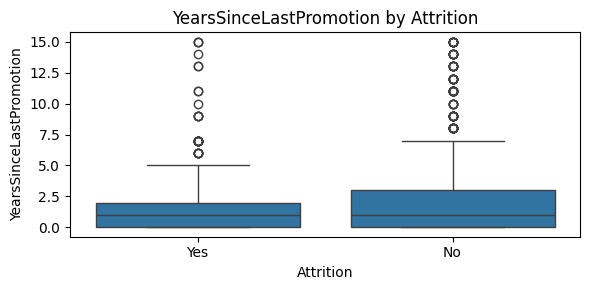

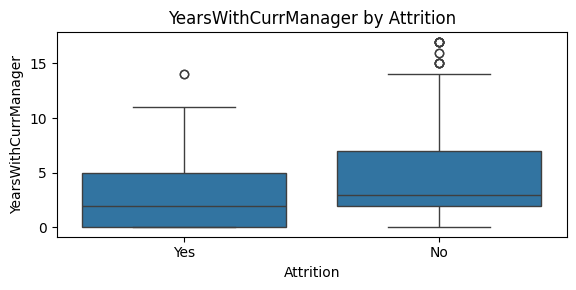

In [17]:
numerical_cols = HR_1.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=HR, x="Attrition", y=col)
    plt.title(f"{col} by Attrition")
    plt.tight_layout()
    %matplotlib inline
    plt.show()

**Highlights:**

Upon initial inspection, variables Age, DailyRate, DistanceFromHome, EnvironmentSatisfaction, JobLevel, JobSatisfaction, MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWith CurrManager possibly seem to be affecting Attrition - the target variable.

The dataset has following numerical columns:  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Interquartile ranges: [13.0, 692.0, 12.0, 2.0, 2.0, 35.75, 1.0, 2.0, 2.0, 5468.0, 12414.5, 3.0, 6.0, 2.0, 1.0, 9.0, 1.0, 1.0, 6.0, 5.0, 3.0, 5.0]
75% quartiles: [43.0, 1157.0, 14.0, 4.0, 4.0, 83.75, 3.0, 3.0, 4.0, 8379.0, 20461.5, 4.0, 18.0, 4.0, 1.0, 15.0, 3.0, 3.0, 9.0, 7.0, 3.0, 7.0]
25% quartiles: [30.0, 465.0, 2.0, 2.0, 2.0, 48.0, 2.0, 1.0, 2.0, 2911.0, 8047.0, 1.0, 12.0, 2.0, 0.0, 6.0, 2.0, 2.0, 3.0, 2.0, 0.0, 2.0]


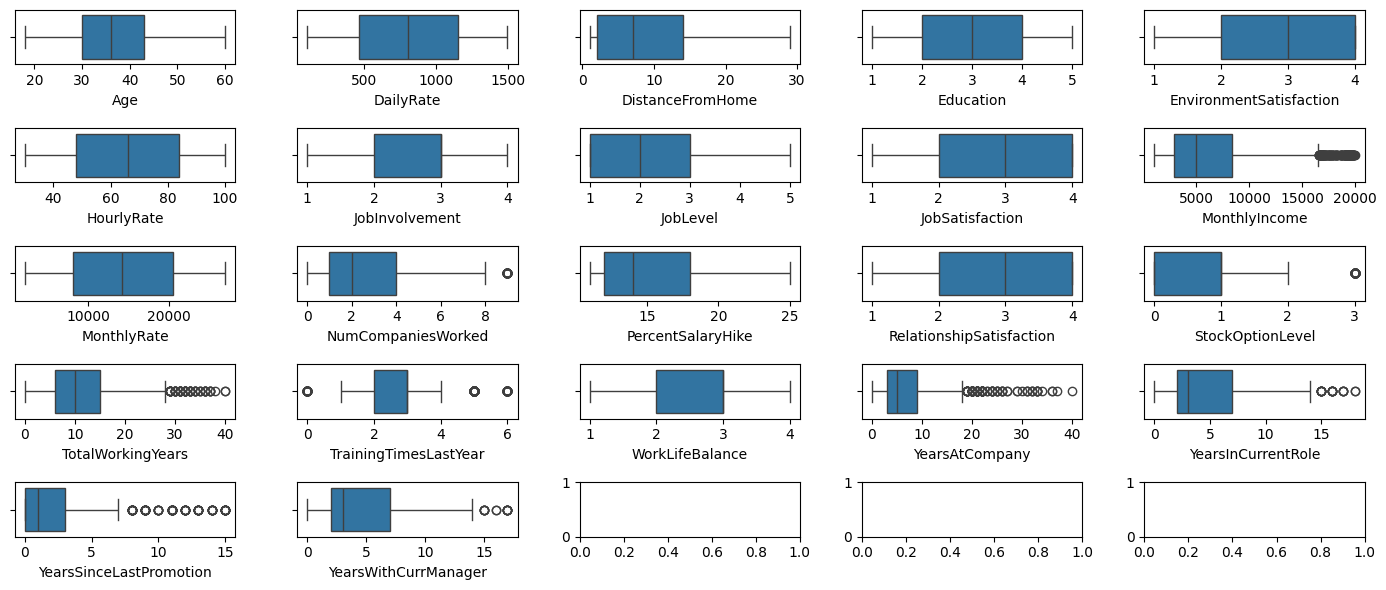

In [18]:
#removing outliers based on boxplot analysis
numeric_cols = HR_1.select_dtypes(include=['float64', 'int'])
#print(numeric_cols)

# Calculate Q1, Q3, and IQR
q1 = numeric_cols.quantile(0.25)
q3 = numeric_cols.quantile(0.75)
iqr = q3 - q1

print("The dataset has following numerical columns: ", numerical_cols)
print("Interquartile ranges:", iqr.tolist())
print("75% quartiles:", q3.tolist())
print("25% quartiles:", q1.tolist())

# Define lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace outliers with bounds
numeric_cols_clipped = numeric_cols.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Replace the original numeric columns in the dataset
HR_1[numeric_cols.columns] = numeric_cols_clipped

# Descriptive statistics
HR_1.describe()

fig, axes = plt.subplots(5, 5, figsize=(14, 6)) # alterar aqui de acordo com o nº de variáveis numéricas

for ax, col in zip(axes.flatten(), numeric_cols):
    sns.boxplot(ax=ax, data=HR, x=col)

plt.tight_layout()
plt.show()

JobLevel, MonthlyIncome, NumCompaniesWorked, PerformanceRating, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion are all right-skewed variables.

`MonthlyIncome` , `TotalWorkingYears` , `YearsAtCompany` and `YearsSinceLastPromotion` are especially right-skewed, so we should use a log transformation for these variables.

In [19]:
HR_1['MonthlyIncomeLog'] = np.log(HR_1['MonthlyIncome']+1#, where=HR_1['MonthlyIncome']>0
                                  )
HR_1['TotalWorkingYearsLog'] = np.log(HR_1['TotalWorkingYears']+1#, where=HR_1['TotalWorkingYears']>0
                                      )
HR_1['YearsAtCompanyLog'] = np.log(HR_1['YearsAtCompany']+1#, where=HR_1['YearsAtCompany']>0
                                   )
HR_1['YearsSinceLastPromotionLog'] = np.log(HR_1['YearsSinceLastPromotion']+1#, where=HR_1['YearsSinceLastPromotion']>0
                                            )

HR_1.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncomeLog,TotalWorkingYearsLog,YearsAtCompanyLog,YearsSinceLastPromotionLog
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8.0,Yes,11,1,0.0,8.0,0.5,1,6,4.0,0.0,5.0,8.698514,2.197225,1.945910,0.000000
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1.0,No,23,4,1.0,10.0,3.0,3,10,7.0,1.0,7.0,8.543056,2.397895,2.397895,0.693147
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6.0,Yes,15,2,0.0,7.0,3.0,3,0,0.0,0.0,0.0,7.645398,2.079442,0.000000,0.000000
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1.0,Yes,11,3,0.0,8.0,3.0,3,8,7.0,3.0,0.0,7.975908,2.197225,2.197225,1.386294
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,8.5,No,12,4,1.0,6.0,3.0,3,2,2.0,2.0,2.0,8.151622,1.945910,1.098612,1.098612


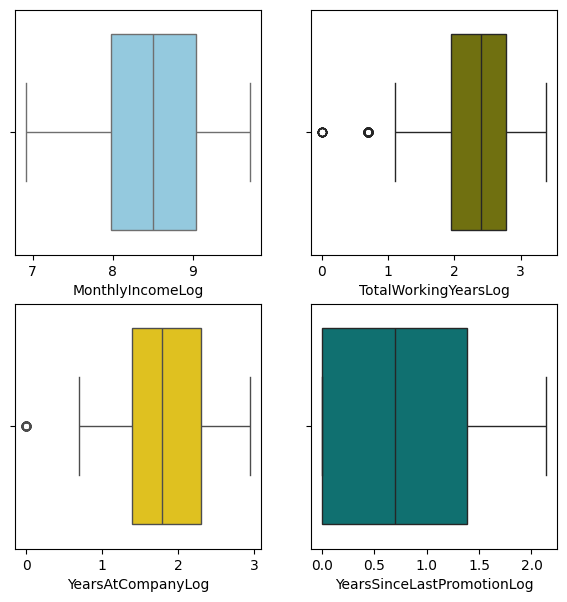

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.boxplot(data=HR_1, x="MonthlyIncomeLog", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=HR_1, x="TotalWorkingYearsLog", color="olive", ax=axs[0, 1])
sns.boxplot(data=HR_1, x="YearsAtCompanyLog", color="gold", ax=axs[1, 0])
sns.boxplot(data=HR_1, x="YearsSinceLastPromotionLog", color="teal", ax=axs[1, 1])

plt.show()

Should we drop those with 0 TotalWorkingYears or 0 YearsAtCompany?

### **3.2. Categorical features**

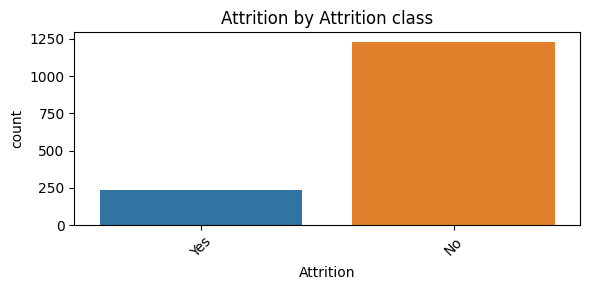

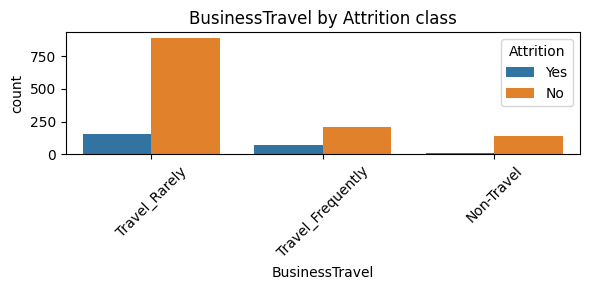

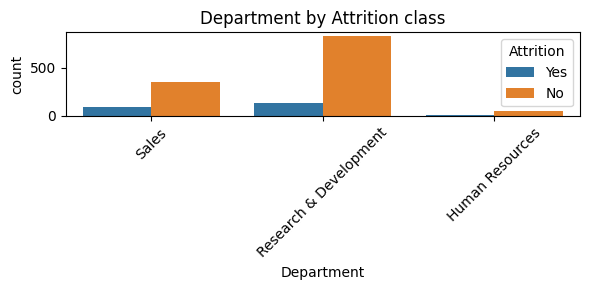

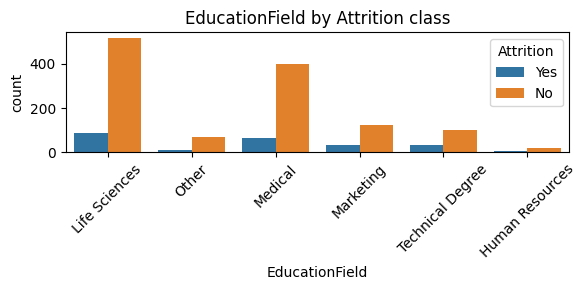

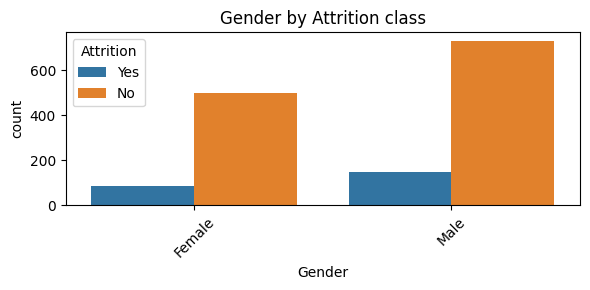

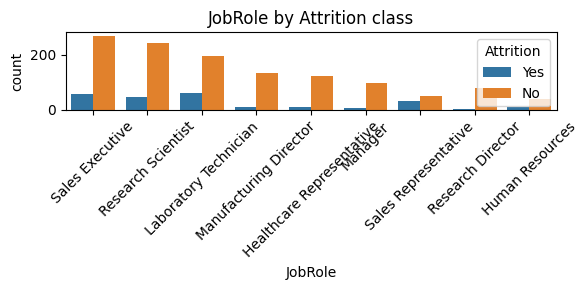

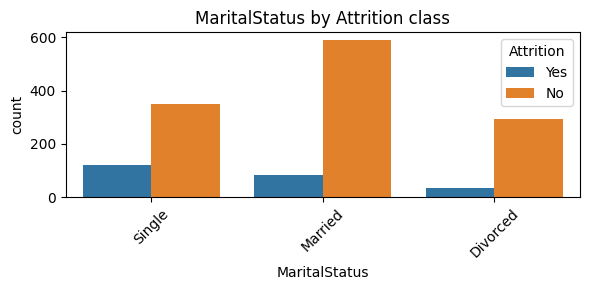

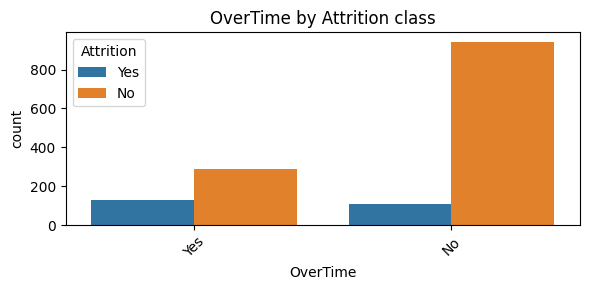

In [21]:
categorical_cols = HR_1.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=HR, x=col, hue="Attrition")
    plt.title(f"{col} by Attrition class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

The Attrition target variable is unbalanced, therefore it is better to use percentages rather than absolute values to check for relationships with the other variables.

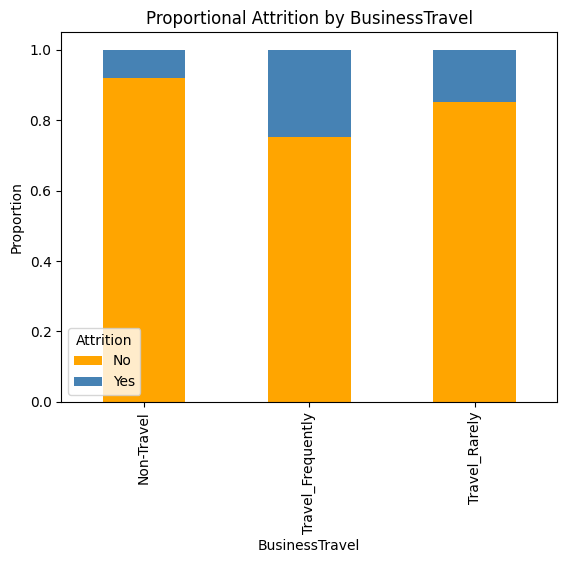

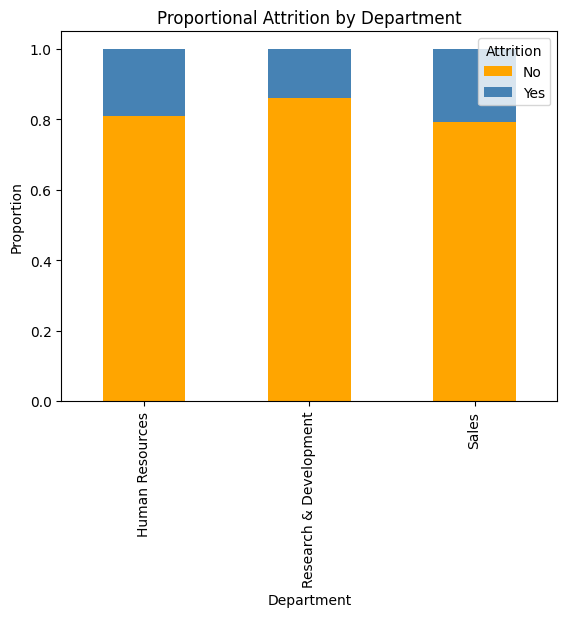

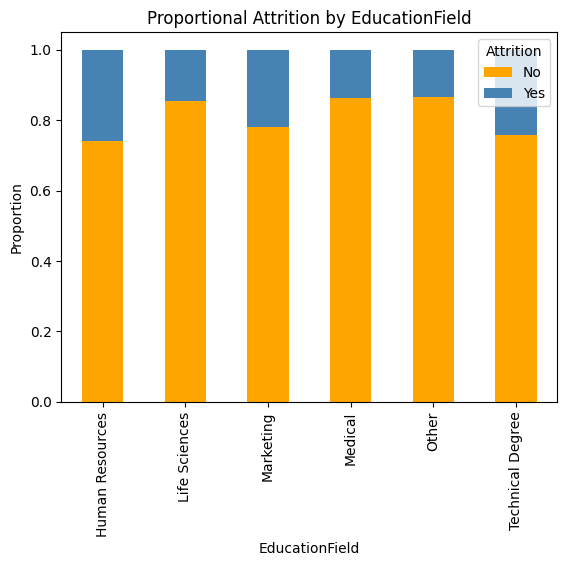

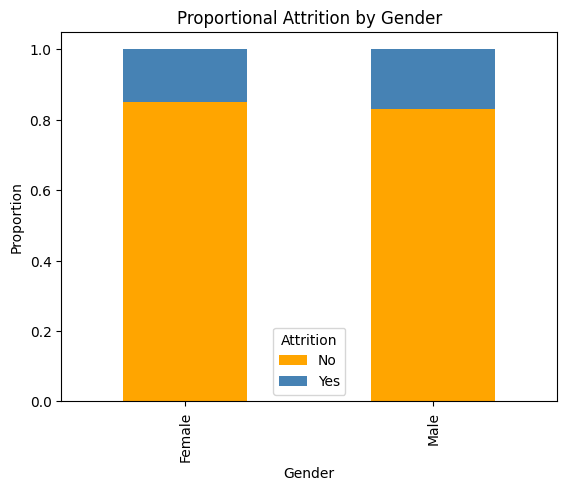

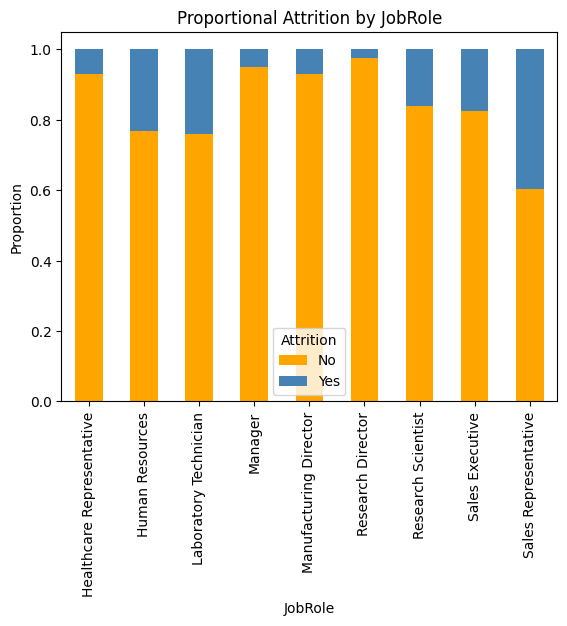

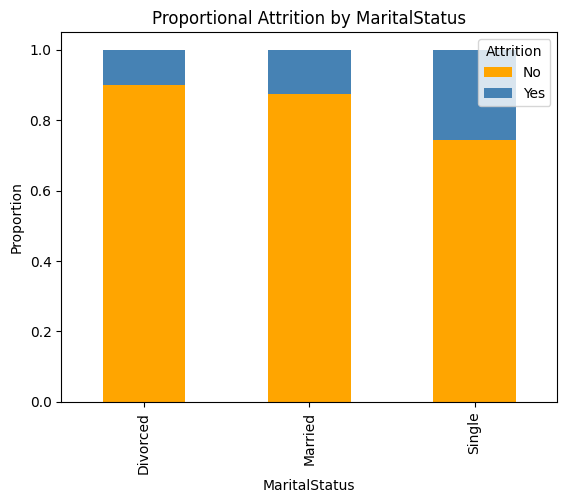

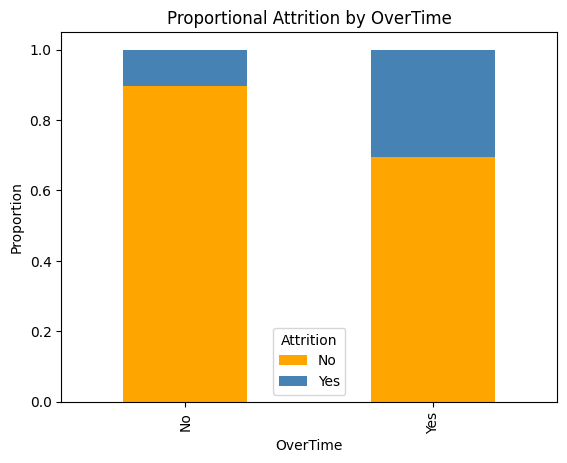

In [22]:
for col in HR_1.select_dtypes(include='object').drop(columns='Attrition').columns:
  region_crosstab = pd.crosstab(HR_1[col], HR_1['Attrition'], normalize='index')
  region_crosstab.plot(kind='bar', stacked=True, color=['orange', 'steelblue'])
  plt.title(f'Proportional Attrition by {col}')
  plt.ylabel('Proportion')
  plt.show()

The categorical variables seemingly related to Attrition are BusinessTravel (Travel_Frequently), EducationField (Human Resources, Marketing, Technical Degree), JobRole (Sales Representatives, Laboratory Technicians and Human Resources), MaritalStatus (Single), and OverTime (Yes).

## **4. Multivariate data analysis**

The purpose of this section is to analyze potential correlations among the various variables in the dataset.

At this stage, bothe numerical and categorical features need to be treated.

On one hand, the numerical features need to be scaled. It is important to note that in this dataset, some numerical variables are actually ordinal categorical features, where numbers represent ordered categories. However, since the scale logic is consistent across the dataset, this transformation can be applied directly. For example, the Work-Life Balance variable is rated on a scale from 1 to 4, where 1 represents “Bad” and 4 represents “Best.” The Performance Rating feature follows the same structure, ranging from 1 (“Low”) to 4 (“Outstanding”).

Scaling is essential to prevent features with larger numerical ranges from dominating others, and it helps models such as Linear Regression and K-Nearest Neighbors converge more efficiently and accurately, leading to improved performance. In this project, the MinMaxScaler() was used, normalizing all variables to a range between 0 and 1.

On the other hand, categorical features must be converted into numerical representations so that machine learning algorithms can process and interpret them effectively.

### **4.1. Numerical features - Applying Scaler**

In [23]:

HR_1_1 = HR_1.copy()

# Seleciona apenas colunas numéricas (int64, float64)
numeric_cols = HR_1_1.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
HR_1_1[numeric_cols] = scaler.fit_transform(HR_1_1[numeric_cols])

HR_1_1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncomeLog,TotalWorkingYearsLog,YearsAtCompanyLog,YearsSinceLastPromotionLog
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.547619,Yes,Travel_Rarely,0.715820,Sales,0.000000,0.25,Life Sciences,0.333333,Female,0.914286,0.666667,0.25,Sales Executive,1.000000,Single,0.320062,0.698053,0.941176,Yes,0.000000,0.000000,0.0,0.280702,0.000,0.000000,0.333333,0.275862,0.000000,0.344828,0.636374,0.649223,0.660876,0.000000
2,0.738095,No,Travel_Frequently,0.126700,Research & Development,0.250000,0.00,Life Sciences,0.666667,Male,0.442857,0.333333,0.25,Research Scientist,0.333333,Married,0.264642,0.916001,0.117647,No,0.857143,1.000000,0.4,0.350877,0.625,0.666667,0.555556,0.482759,0.133333,0.482759,0.580821,0.708516,0.814381,0.323891
4,0.452381,Yes,Travel_Rarely,0.909807,Research & Development,0.035714,0.25,Other,1.000000,Male,0.885714,0.333333,0.00,Laboratory Technician,0.666667,Single,0.069419,0.012126,0.705882,Yes,0.285714,0.333333,0.0,0.245614,0.625,0.666667,0.000000,0.000000,0.000000,0.000000,0.260042,0.614421,0.000000,0.000000
5,0.357143,No,Travel_Frequently,0.923407,Research & Development,0.071429,0.75,Life Sciences,1.000000,Female,0.371429,0.666667,0.00,Research Scientist,0.666667,Married,0.122014,0.845814,0.117647,Yes,0.000000,0.666667,0.0,0.280702,0.625,0.666667,0.444444,0.482759,0.400000,0.000000,0.378150,0.649223,0.746229,0.647781
7,0.214286,No,Travel_Rarely,0.350036,Research & Development,0.035714,0.00,Medical,0.000000,Male,0.142857,0.666667,0.00,Laboratory Technician,0.333333,Married,0.157912,0.583738,1.000000,No,0.071429,1.000000,0.4,0.210526,0.625,0.666667,0.111111,0.137931,0.266667,0.137931,0.440941,0.574966,0.373114,0.513354


### **4.2. Categorical features - Applying encoding**

Due to the nature of the problem and the characteristics of features, the encoding needs to be performed case by case. 

- Department and job roles - any option is dropped
- Education Field - drop the other option 
- BusinessTravel, Gender, MaritalStatus,  OverTime
- Attrition mapped as binary

In [24]:
# Department: do not drop any category
HR_1_1 = pd.get_dummies(HR_1_1, columns=['Department'], drop_first=False)

# EducationField: drop only 'Other'
edu_dummies = pd.get_dummies(HR_1_1['EducationField'], prefix='EducationField')
edu_dummies = edu_dummies.drop('EducationField_Other', axis=1)
HR_1_1 = pd.concat([HR_1_1.drop('EducationField', axis=1), edu_dummies], axis=1)

# JobRole: do not drop any category
HR_1_1 = pd.get_dummies(HR_1_1, columns=['JobRole'], drop_first=False)

# For the remaining categorical variables, drop first as before
HR_1_1 = pd.get_dummies(
    HR_1_1,
    columns=['BusinessTravel', 'Gender', 'MaritalStatus', 'OverTime'],
    drop_first=True
)

# Encode the target variable 'Attrition' as binary
HR_1_1['Attrition'] = HR_1_1['Attrition'].map({'Yes': 1, 'No': 0})

HR_1_1.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncomeLog,TotalWorkingYearsLog,YearsAtCompanyLog,YearsSinceLastPromotionLog,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.547619,1,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.320062,0.698053,0.941176,0.000000,0.000000,0.0,0.280702,0.000,0.000000,0.333333,0.275862,0.000000,0.344828,0.636374,0.649223,0.660876,0.000000,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True
2,0.738095,0,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.264642,0.916001,0.117647,0.857143,1.000000,0.4,0.350877,0.625,0.666667,0.555556,0.482759,0.133333,0.482759,0.580821,0.708516,0.814381,0.323891,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False
4,0.452381,1,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.069419,0.012126,0.705882,0.285714,0.333333,0.0,0.245614,0.625,0.666667,0.000000,0.000000,0.000000,0.000000,0.260042,0.614421,0.000000,0.000000,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,True,True
5,0.357143,0,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.122014,0.845814,0.117647,0.000000,0.666667,0.0,0.280702,0.625,0.666667,0.444444,0.482759,0.400000,0.000000,0.378150,0.649223,0.746229,0.647781,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True
7,0.214286,0,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.157912,0.583738,1.000000,0.071429,1.000000,0.4,0.210526,0.625,0.666667,0.111111,0.137931,0.266667,0.137931,0.440941,0.574966,0.373114,0.513354,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False


### **Result dataframe: HR_1_1 - has the variables encoded**

### **4.3. Spearman correlation analysis**

Spearman is useful to understand if there are redudant features do disconsider, due to their high correlation. It is suitable of continuos and ordinal data.

In [25]:
correlation_HR_1_1 = HR_1_1.corr(method='spearman', numeric_only=True)
correlation_HR_1_1

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncomeLog,TotalWorkingYearsLog,YearsAtCompanyLog,YearsSinceLastPromotionLog,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
Age,1.000000,-0.171214,0.007290,-0.019291,0.204937,0.009820,0.028858,0.034456,0.489618,-0.005185,0.471781,0.017451,0.353213,0.007709,0.046063,0.056633,0.656802,0.001396,-0.003707,0.250337,0.197952,0.171492,0.194821,0.471781,0.656802,0.250337,0.171492,0.020814,0.018278,-0.028086,0.001786,0.023308,0.039654,-0.012820,-0.036285,0.106222,-0.025756,-0.141417,0.284270,0.053102,0.184877,-0.152827,-0.001102,-0.174193,-0.021040,0.018513,-0.036088,0.077494,-0.113026,0.027044
Attrition,-0.171214,1.000000,-0.056970,0.079248,-0.030346,-0.096486,-0.006692,-0.119496,-0.190370,-0.102948,-0.199086,0.015258,0.030505,-0.023612,-0.042664,-0.172296,-0.199320,-0.051347,-0.051951,-0.191121,-0.180566,-0.053762,-0.175355,-0.199086,-0.199320,-0.191121,-0.053762,0.016832,-0.085293,0.080855,0.036466,-0.032703,0.055781,-0.046999,0.069355,-0.078696,0.036215,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,0.115143,-0.049538,0.029453,-0.090984,0.175419,0.246118
DailyRate,0.007290,-0.056970,1.000000,-0.002754,-0.013607,0.018961,0.023511,0.042469,0.003816,0.027829,0.016458,-0.032360,0.036548,0.025070,0.009685,0.038514,0.021733,-0.012206,-0.040352,-0.009335,0.007281,-0.037863,-0.004716,0.016458,0.021733,-0.009335,-0.037863,-0.027101,0.014350,-0.002912,-0.043171,0.004007,-0.063909,0.033757,0.030880,0.039879,-0.021566,-0.006764,-0.013485,-0.005780,0.000897,-0.002829,-0.000181,0.005845,-0.012103,0.002207,-0.011415,0.040180,-0.076012,0.008383
DistanceFromHome,-0.019291,0.079248,-0.002754,1.000000,0.015708,-0.010401,0.020446,0.034430,0.022148,-0.013078,0.002599,0.039618,-0.009592,0.029666,0.005852,0.030190,-0.003065,-0.025876,-0.020402,0.011119,0.013732,-0.005071,0.004422,0.002599,-0.003065,0.011119,-0.005071,-0.017161,-0.019487,0.027727,-0.004091,-0.040147,0.053737,0.018884,-0.025950,0.018303,-0.027716,0.018464,-0.049064,-0.003774,-0.018166,-0.016738,0.044678,-0.005625,-0.008361,-0.004095,0.004387,0.017019,-0.026259,0.036639
Education,0.204937,-0.030346,-0.013607,0.015708,1.000000,-0.027625,0.014432,0.037231,0.107419,-0.005175,0.119805,-0.021214,0.135103,0.004300,-0.013173,0.013794,0.161789,-0.022948,0.017350,0.063552,0.054589,0.032035,0.051270,0.119805,0.161789,0.063552,0.032035,0.006396,-0.017674,0.015473,0.022020,0.015259,0.072330,-0.075678,-0.024923,0.030009,-0.011437,-0.064955,0.025893,-0.008335,0.046079,0.004425,0.051082,-0.083289,-0.006252,0.002990,-0.009903,-0.001209,0.006131,-0.017003
EnvironmentSatisfaction,0.009820,-0.096486,0.018961,-0.010401,-0.027625,1.000000,-0.052380,-0.015301,-0.000192,-0.002993,-0.015516,0.037477,0.006151,-0.030489,0.005353,0.009826,-0.014143,-0.012727,0.027169,0.008352,0.020172,0.026510,-0.001758,-0.015516,-0.014143,0.008352,0.026510,-0.011666,0.031796,-0.027767,-0.010193,-0.020526,-0.000833,-0.023223,0.027079,0.011491,-0.025943,0.000764,0.011842,0.059655,-0.046003,0.003960,-0.024693,-0.001975,-0.010527,0.007131,0.001863,-0.028464,0.013736,0.067670
HourlyRate,0.028858,-0.006692,0.023511,0.0204

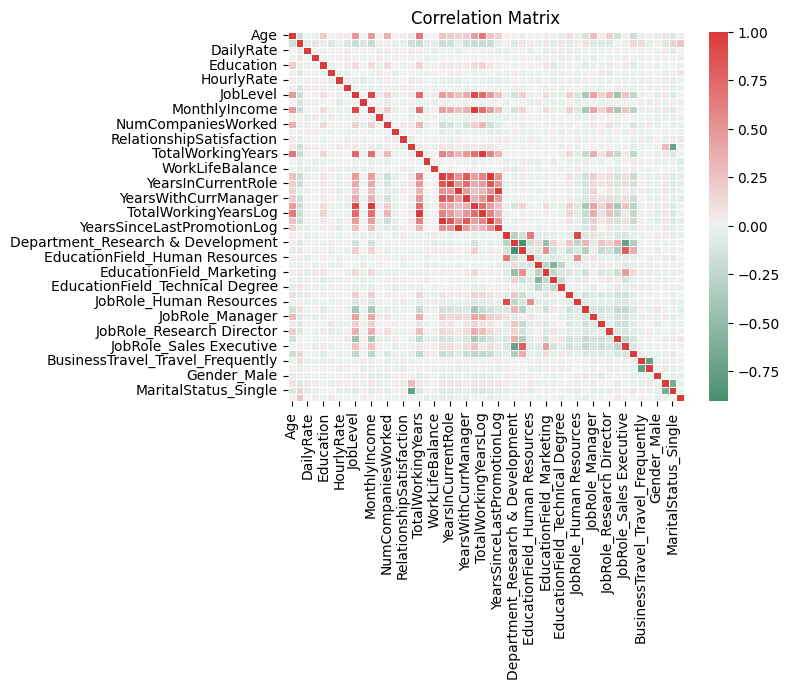

In [26]:
sns.heatmap(correlation_HR_1_1, cmap=sns.diverging_palette(150, 12, as_cmap=True), center=0, annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [27]:
sorted_columns = sorted(correlation_HR_1_1.columns)
correlation_HR_1_1_sorted = correlation_HR_1_1.loc[sorted_columns, sorted_columns]

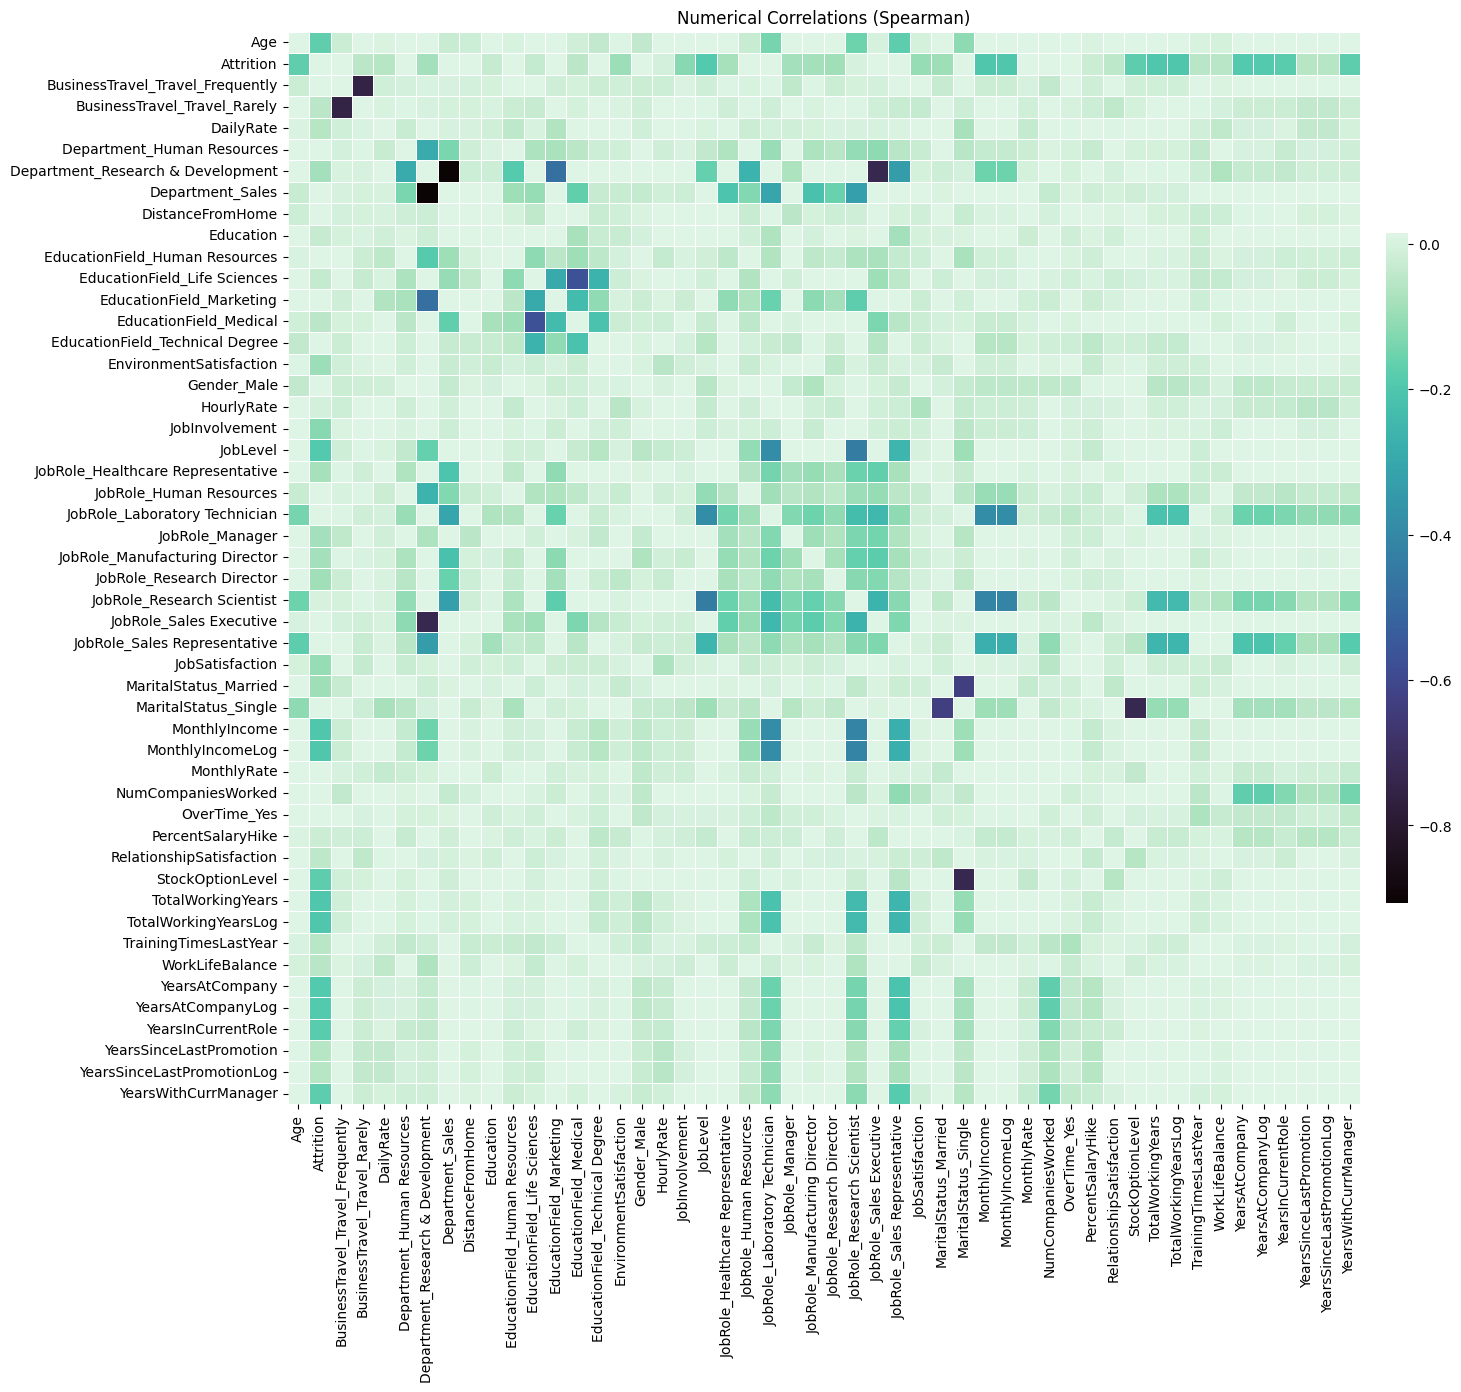

In [28]:
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_HR_1_1_sorted, vmax=0.015, cmap="mako", square=True, linewidths=0.5, annot=False, cbar_kws={
        'shrink': 0.6,      # Makes colorbar smaller (60% of default)
        'aspect': 30,        # Makes colorbar narrower
        'pad': 0.02          # Adds space between plot and colorbar
    })
plt.title("Numerical Correlations (Spearman)")
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

**Highlights of features and target category:**

The image above allows to conclude that aren't strong correlations between the features and the target variable (attrition). However, some points to hightlight 

- **Attrition and Age:** the spearman correlation coefficient is -0.171214, which is a negative relationship. This can be interpreted as the age increases the attrition score decreases, so <u>older employees are less likely to leave the company</u>. However, the score is low so the variable by itself doesn't explain the attrition. 

- **Attrition and Job Level:** the spearman correlation coefficient is -0.190370, also a negative relationship. The job level variable represents the hierarchy at the company and this suggests that <u> as the level is higher, the attrition score decreases</u>.

- **Attrition and Montly Income:** the spearman correlation coefficient is -0.199086, also a negative relationship. As the monthly income increases the attrition score tends to be lower, indicating that <u>higher incomes are associated with a lower rate of employee turnover</u>.

- **Attrition and Total Working Years:** the spearman correlation coefficient is -0.199320, which indicates that <u>more years working represents a decrease in the attrition score</u>. It corroborates the age seen previously, although it is interesting that the age itself doesn't have a strong correlation with the total working years.

- **Attrition and Years at the Company:** the spearman correlation coefficient is -0.191121, which indicates a <u>lower score of attrition when the employee has more years of work in the company</u>.

- **Attrition and Years in the Current Rule:** the spearman correlation coefficient is -0.180566, indicates that <u>more years in the current rule are slightly related with lower attrition score</u>.

- **Attrition and Years with the Current Manager:** the spearman correlation coefficient is -0.175355, indicates that <u>more years with the current manager represents a lower attrition score</u>.

**Highlights of other feature relations:**

The strongest correlation coefficients -  the darkest spots were observed among the dummy variables for features like Department, Gender, and Marital Status due to the structural artifacts of the data encoding process, not signals of real-world predictive power. 

These strong relationships, particularly the high negative ones, result from multicollinearity. When a categorical feature with $N$ options is converted into $N$ binary dummy columns (e.g., Gender_Male and Gender_Female), the columns are perfectly or near-perfectly dependent: if one is '1' (True), the other(s) must be '0' (False). 

For instance, the perfect negative correlation of $-1.0$ between Gender_Male and Gender_Female simply confirms that a person cannot be both simultaneously. 

While mathematically sound, these high correlations are uninformative for predicting Attrition and would be ignored when assessing external factors influencing employee turnover.

The focus must remain on the weaker, yet meaningful, correlations found between the demographic/satisfaction variables and the target variable, Attrition.

### **4.4. Correlation Ratio **

In [29]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.mean(cat_measures) if len(cat_measures) > 0 else 0
    y_total_avg = np.sum(y_avg_array * n_array) / np.sum(n_array)
    numerator = np.sum(n_array * (y_avg_array - y_total_avg) ** 2)
    denominator = np.sum((measurements - y_total_avg) ** 2)
    return np.sqrt(numerator / denominator)

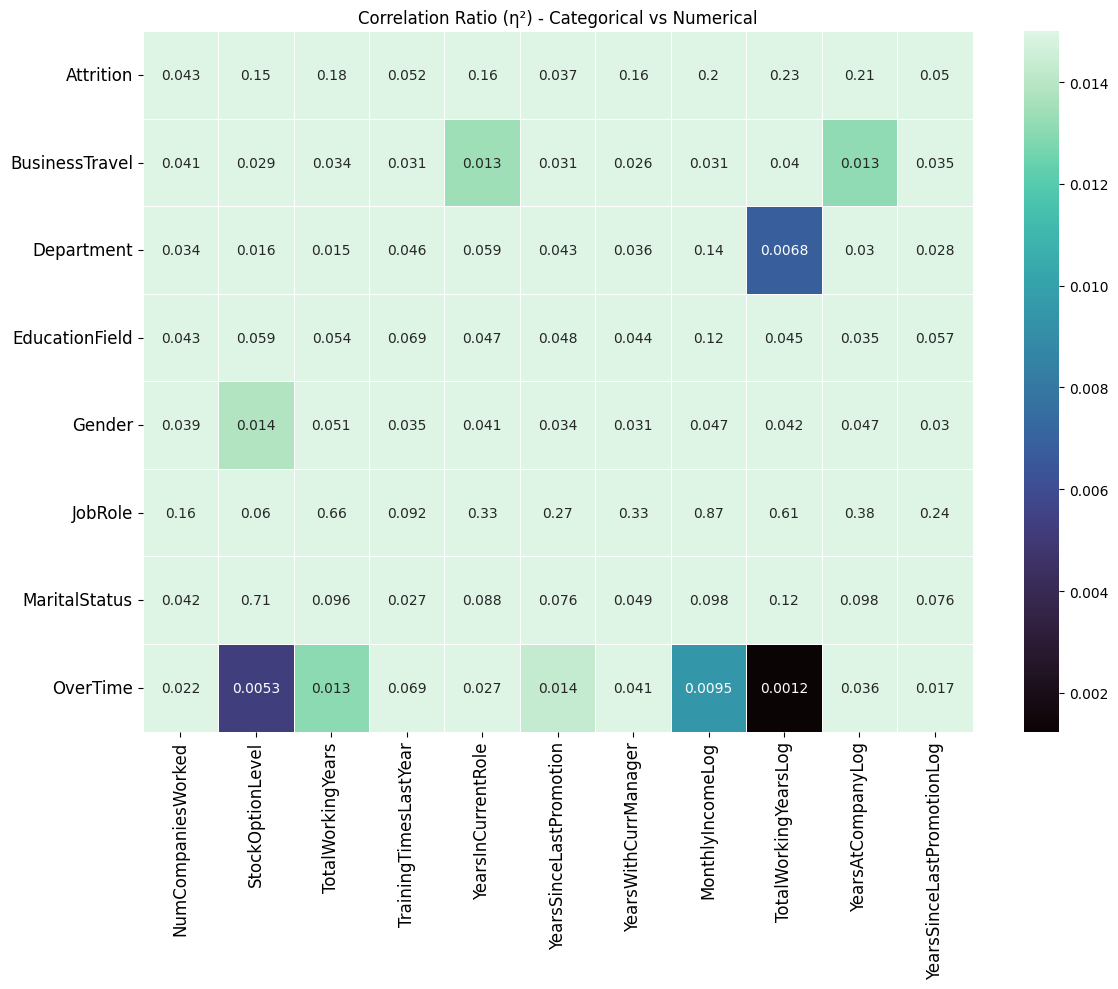

In [30]:
# Para o correlation ratio funcionar, tem de ser com variáveis categóricas vs variáveis numéricas
# tive de usar o dataset antigo
num_cols = HR_1.select_dtypes(include=['float64']).columns
cat_cols = HR_1.select_dtypes(include=['object']).columns
cat_num_corr = pd.DataFrame(index=cat_cols, columns=num_cols)

for cat in cat_cols:
    for num in num_cols:
        cat_num_corr.loc[cat, num] = correlation_ratio(HR_1[cat].values, HR_1[num].values)

cat_num_corr = cat_num_corr.astype(float)

plt.figure(figsize=(12, 10))
sns.heatmap(cat_num_corr, vmax=0.015, cmap="mako", linewidths=0.5, annot=True)
plt.title("Correlation Ratio (η²) - Categorical vs Numerical")
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()
# não adiciona muita informação em relação à outra correlação

## **5. Feature Engineering**

- **Attrition and Age:** the spearman correlation coefficient is -0.171214, which is a negative relationship. This can be interpreted as the age increases the attrition score decreases, so <u>older employees are less likely to leave the company</u>. However, the score is low so the variable by itself doesn't explain the attrition. 

- **Attrition and Job Level:** the spearman correlation coefficient is -0.190370, also a negative relationship. The job level variable represents the hierarchy at the company and this suggests that <u> as the level is higher, the attrition score decreases</u>.

- **Attrition and Montly Income:** the spearman correlation coefficient is -0.199086, also a negative relationship. As the monthly income increases the attrition score tends to be lower, indicating that <u>higher incomes are associated with a lower rate of employee turnover</u>.

- **Attrition and Total Working Years:** the spearman correlation coefficient is -0.199320, which indicates that <u>more years working represents a decrease in the attrition score</u>. It corroborates the age seen previously, although it is interesting that the age itself doesn't have a strong correlation with the total working years.

- **Attrition and Years at the Company:** the spearman correlation coefficient is -0.191121, which indicates a <u>lower score of attrition when the employee has more years of work in the company</u>.

- **Attrition and Years in the Current Rule:** the spearman correlation coefficient is -0.180566, indicates that <u>more years in the current rule are slightly related with lower attrition score</u>.

- **Attrition and Years with the Current Manager:** the spearman correlation coefficient is -0.175355, indicates that <u>more years with the current manager represents a lower attrition score</u>.

Analyse if big differences between monthly rates and montly income may influence the target variable.

In [31]:
rate_income = HR['MonthlyRate'] - HR['MonthlyIncome']
HR['rate_income'] = rate_income
print(HR['rate_income'])


EmployeeNumber
1       13486
2       19777
4         306
5       20250
7       13164
        ...  
2061     9719
2062    11466
2064     -968
2065     7853
2068     5824
Name: rate_income, Length: 1470, dtype: int64


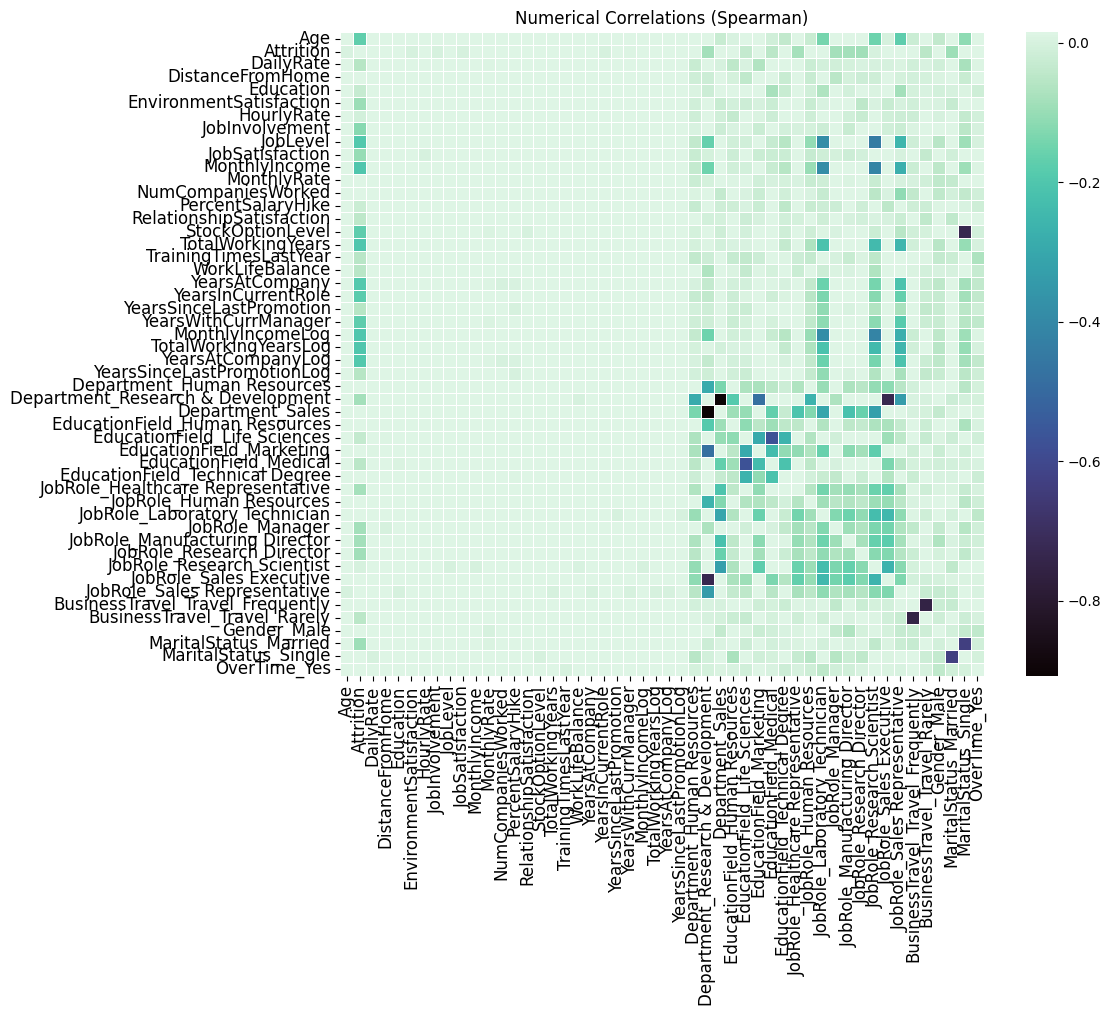

In [32]:
correlation1 = HR_1_1.corr(method='spearman', numeric_only=True)

scaler = MinMaxScaler()
correlation1[numeric_cols] = scaler.fit_transform(correlation1[numeric_cols])

plt.figure(figsize=(12, 10))
sns.heatmap(correlation1, vmax=0.015, cmap="mako", square=True, linewidths=0.5, annot=False)
plt.title("Numerical Correlations (Spearman)")
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

In [33]:
from scipy.stats import pointbiserialr

# Encode Attrition as binary (Yes -> 1, No -> 0)
HR['Attrition_binary'] = HR['Attrition'].map({'Yes': 1, 'No': 0})

# Calculate point biserial correlation
correlation, p_value = pointbiserialr(HR['rate_income'], HR['Attrition_binary'])

print(f"Point Biserial Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4e}")

Point Biserial Correlation: 0.1025
P-value: 8.2692e-05


In [34]:
rate_income.head()

EmployeeNumber
1    13486
2    19777
4      306
5    20250
7    13164
dtype: int64

## **6. Feature Selection**

### **6.1. Approach 1**

Use the variables studied on the  4.3. spearman correlation analysis

In [35]:
correlation_HR_1_1_sorted

,Age,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,DailyRate,Department_Human Resources,Department_Research & Development,Department_Sales,DistanceFromHome,Education,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Technical Degree,EnvironmentSatisfaction,Gender_Male,HourlyRate,JobInvolvement,JobLevel,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction,MaritalStatus_Married,MaritalStatus_Single,MonthlyIncome,MonthlyIncomeLog,MonthlyRate,NumCompaniesWorked,OverTime_Yes,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TotalWorkingYearsLog,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsAtCompanyLog,YearsInCurrentRole,YearsSinceLastPromotion,YearsSinceLastPromotionLog,YearsWithCurrManager
Age,1.000000,-0.171214,-0.021040,0.018513,0.007290,0.020814,0.018278,-0.028086,-0.019291,0.204937,0.001786,0.023308,0.039654,-0.012820,-0.036285,0.009820,-0.036088,0.028858,0.034456,0.489618,0.106222,-0.025756,-0.141417,0.284270,0.053102,0.184877,-0.152827,-0.001102,-0.174193,-0.005185,0.077494,-0.113026,0.471781,0.471781,0.017451,0.353213,0.027044,0.007709,0.046063,0.056633,0.656802,0.656802,0.001396,-0.003707,0.250337,0.250337,0.197952,0.171492,0.171492,0.194821
Attrition,-0.171214,1.000000,0.115143,-0.049538,-0.056970,0.016832,-0.085293,0.080855,0.079248,-0.030346,0.036466,-0.032703,0.055781,-0.046999,0.069355,-0.096486,0.029453,-0.006692,-0.119496,-0.190370,-0.078696,0.036215,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.102948,-0.090984,0.175419,-0.199086,-0.199086,0.015258,0.030505,0.246118,-0.023612,-0.042664,-0.172296,-0.199320,-0.199320,-0.051347,-0.051951,-0.191121,-0.191121,-0.180566,-0.053762,-0.053762,-0.175355
BusinessTravel_Travel_Frequently,-0.021040,0.115143,1.000000,-0.753092,-0.012103,-0.007485,0.003340,-0.000160,-0.008361,-0.006252,0.011818,0.031128,-0.016586,-0.005367,-0.023569,-0.010527,-0.022015,-0.019292,0.006497,-0.016058,0.008029,0.001896,0.010023,-0.042583,0.009783,-0.023579,-0.004461,-0.010175,0.055469,0.027756,-0.030785,0.027734,-0.024483,-0.024483,0.000342,-0.037103,0.029392,-0.014682,0.029452,-0.013142,-0.011014,-0.011014,0.011582,0.007543,0.017300,0.017300,0.016146,0.035392,0.035392,0.012914
BusinessTravel_Travel_Rarely,0.018513,-0.049538,-0.753092,1.000000,0.002207,0.009618,0.000465,-0.004718,-0.004095,0.002990,-0.024073,-0.030355,0.034668,-0.003930,0.017521,0.007131,-0.014682,0.028003,0.019436,0.008832,-0.015503,0.008962,-0.014815,0.027294,0.000598,0.034600,0.010588,-0.011920,-0.025257,-0.034014,0.055613,-0.020808,0.028436,0.028436,-0.010491,0.037121,-0.000539,-0.019910,-0.040231,-0.005137,0.023961,0.023961,0.010540,-0.009466,-0.022730,-0.022730,-0.024599,-0.037283,-0.037283,-0.023301
DailyRate,0.007290,-0.056970,-0.012103,0.002207,1.000000,-0.027101,0.014350,-0.002912,-0.002754,-0.013607,-0.043171,0.004007,-0.063909,0.033757,0.030880,0.018961,-0.011415,0.023511,0.042469,0.003816,0.039879,-0.021566,-0.006764,-0.013485,-0.005780,0.000897,-0.002829,-0.000181,0.005845,0.027829,0.040180,-0.076012,0.016458,0.016458,-0.032360,0.036548,0.008383,0.025070,0.009685,0.038514,0.021733,0.021733,-0.012206,-0.040352,-0.009335,-0.009335,0.007281,-0.037863,-0.037863,-0.004716
Department_Human Resources,0.020814,0.016832,-0.007485,0.009618,-0.027101,1.000000,-0.290754,-0.139650,-0.017161,0.006396,0.646436,-0.068040,-0.073692,-0.049761,-0.019469,-0.011666,0.035652,-0.015357,0.002839,-0.035575,-0.066186,0.904983,-0.097859,0.087615,-0.070000,-0.050765,-0.105352,-0.112959,-0.051764,-0.026270,0.034767,-0.051443,-0.032812,-0.032812,-0.024422,0.004475,-0.006178,-0.031234,0.032732,-0.006162,-0.006498,-0.006498,-0.036966,0.055457,-0.000763,-0.000763,-0.029643,-0.007159,-0.00715

- Age (-0.17) is highly overall correlated with **TotalWorkingYears** (-0.20)
- Department (0.08) is highly overall correlated with EducationField (0.07) and JobRole (0.16)
- EducationField (0.07) is highly overall correlated with Department (0.08)
- JobLevel (-0.19) is highly overall correlated with JobRole (0.16),  MonthlyIncome (0.015), and **TotalWorkingYears (-0.20)**
- JobRole (0.16) is highly overall correlated with Department (0.08) and JobLevel (-0.19)
- **MaritalStatus (0.18)** is highly overall correlated with StockOptionLevel (-0.17)
- MonthlyIncome (0.015) is highly overall correlated with JobLevel (-0.19) and **TotalWorkingYears** (-0.20)
- **PercentSalaryHike (-0.02)** is highly overall correlated with PerformanceRating (---)
- PerformanceRating (---) is highly overall correlated with PercentSalaryHike (-0.02)
- StockOptionLevel (-0.17) is highly overall correlated with **MaritalStatus** (0.18)
- **TotalWorkingYears (-0.20)** is highly overall correlated with Age (-0.17), JobLevel (-0.19), YearsAtCompany (-0.19) and MonthlyIncome (0.015)
- YearsAtCompany (-0.19) is highly overall correlated with **TotalWorkingYears (-0.20)**, YearsInCurrentRole (-0.18), YearsSinceLastPromotion (-0.05), YearsWithCurrManager (-0.18) 
- YearsInCurrentRole (-0.18) is highly overall correlated with **YearsAtCompany (-0.19)**, YearsSinceLastPromotion (-0.05), YearsWithCurrManager (-0.18)
- YearsSinceLastPromotion (-0.05) is highly overall correlated with YearsAtCompany (-0.19) and YearsInCurrentRole (-0.18)
- YearsWithCurrManager (-0.18) is highly overall correlated with YearsAtCompany (-0.19) and YearsInCurrentRole (-0.18)

Remove:
- Age
- Department
- EducationField
- JobLevel
- JobRole
- StockOptionLevel
- MonthlyIncome
- PerformanceRating
- YearsInCurrentRole

Keep:
- TotalWorkingYears
- MaritalStatus
- PercentSalaryHike
- YearsAtCompany

In [ ]:


# > 0.8 entre duas variáveis - dropar uma das variáveis, manter a com maior correlação com a target

## **7. Applying StratifiedKFold**

In [48]:
from sklearn.model_selection import StratifiedKFold

def select_best_cat_features(X, y, columns, n_splits=5, alpha=0.05):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    categorical_cols = columns

    significance_counts = {col: 0 for col in categorical_cols}

    for count, (train_index, val_index) in enumerate(skf.split(X, y), start=1):
        print(f'\n{"_"*40}\nSPLIT {count}\n')

        X_train, y_train = X.iloc[train_index], y.iloc[train_index]
        X_cat = X_train[categorical_cols]

        for col in X_cat.columns:
            contingency = pd.crosstab(X_cat[col], y_train)
            _, p, _, _ = chi2_contingency(contingency)
            if p < alpha:
                print(f"{col}: SIGNIFICANT (p={p:.4f})")
                significance_counts[col] += 1
            else:
                print(f"{col}: NOT significant (p={p:.4f})")

    print("\nSummary of significance across splits:")
    summary = pd.DataFrame.from_dict(significance_counts, orient='index', columns=['Significant_Splits'])
    summary['% Splits Significant'] = (summary['Significant_Splits'] / n_splits) * 100
    return summary.sort_values(by='Significant_Splits', ascending=False)

In [49]:
y = HR_1['Attrition'].copy()
X = HR_1.drop(columns=['Attrition']).copy()

# Select categorical and binary-like columns
columns = X.columns.tolist()

# Run Chi-Squared feature selection
result_df = select_best_cat_features(X, y, columns=columns)
print(result_df)


________________________________________
SPLIT 1

Age: SIGNIFICANT (p=0.0000)
BusinessTravel: SIGNIFICANT (p=0.0000)
DailyRate: NOT significant (p=0.3521)
Department: SIGNIFICANT (p=0.0107)
DistanceFromHome: SIGNIFICANT (p=0.0050)
Education: NOT significant (p=0.5352)
EducationField: SIGNIFICANT (p=0.0150)
EnvironmentSatisfaction: SIGNIFICANT (p=0.0001)
Gender: NOT significant (p=0.2334)
HourlyRate: NOT significant (p=0.4920)
JobInvolvement: SIGNIFICANT (p=0.0000)
JobLevel: SIGNIFICANT (p=0.0000)
JobRole: SIGNIFICANT (p=0.0000)
JobSatisfaction: SIGNIFICANT (p=0.0005)
MaritalStatus: SIGNIFICANT (p=0.0000)
MonthlyIncome: NOT significant (p=0.1387)
MonthlyRate: NOT significant (p=0.6817)
NumCompaniesWorked: NOT significant (p=0.0634)
OverTime: SIGNIFICANT (p=0.0000)
PercentSalaryHike: NOT significant (p=0.6038)
RelationshipSatisfaction: NOT significant (p=0.3048)
StockOptionLevel: SIGNIFICANT (p=0.0000)
TotalWorkingYears: SIGNIFICANT (p=0.0000)
TrainingTimesLastYear: SIGNIFICANT (p=0.007

### First insights
The variables Age, TotalWorkingHours, MaritalStatus, BusinessTravel, JobRole, Department, YearsWithCurrManager, YearsInCurrentRole, YearsAtCompany, WorkLifeBalance, OverTime, StockOptionLevel, EnvironmentSatisfaction, JobInvolvement, JobLevel and JobSatisfaction all seem relevant to predict if a person will leave the company or not.

In [ ]:
# to do: ler documentação de modelos e implementá-los;
#idealmente era bom ter modelos que suportassem dados unbalanced na target como estes

In [ ]:
# to do: eventually drop variables that do not vary with attrition, if the models do not have embedded feature selection
#examples: JobRole_Researcher Scientist, Education, Gender_Male, HourlyRate, JobRole_Sales Executive, DailyRate, PerformanceRating, PercentSalaryHike, MonthlyRate, MonthlyIncome, JobRole_Human Resources, EducationField_Life Sciences, EducationField_Human Resources, Department_Human Resources
# these variables all seem like that do not matter in predicting Attrition

In [50]:
# feel free to edit or delete this cell and the next ones (it's a placeholder for the models)
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np # Assuming numpy is used for -np.inf

X = HR_1.drop(columns=['Attrition']).copy()
y = HR_1['Attrition'].copy()
# Create a Logistic Regression model with L1 penalty (Lasso)
# The 'liblinear' solver is compatible with L1
l1_model = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    class_weight='balanced',
    random_state=42,
    C=0.1 # The C parameter controls the regularization strength. Smaller values = stronger
)

# Use SelectFromModel to select features with non-zero coefficients
selector_l1 = SelectFromModel(l1_model, prefit=False, threshold=-np.inf)

# Create a pipeline to ensure scaling is performed before selection
pipeline = Pipeline([
    ('scaler', X),
    ('selector', selector_l1),
    ('model', l1_model) # The same model or another can be used for final training
])

# To see the selected features:
# 1. Train the pipeline
pipeline.fit(X, y)

# 2. Get the feature mask from the 'selector' step
selected_mask = pipeline.named_steps['selector'].get_support()
selected_features = X.columns[selected_mask]

print(f"⭐{len(selected_features)} Features selected with L1 (Lasso):")
for feature in selected_features.tolist():
    print(f"- {feature}")

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [51]:
def select_optimal_features_rfe(X, y, base_model, feature_range, config):
    """
    Uses RFE with cross-validation to select the optimal number of features for a given estimator.

    Parameters
    ----------
    X : array-like or ndarray
        Preprocessed feature matrix.
    y : array-like
        Target vector.
    base_model : sklearn estimator
        The model to use with RFE.
    feature_range : iterable
        The list or range of numbers of features to try.
    config : dict
        Configuration with keys 'metric', 'n_splits', and 'random_state'.

    Returns
    -------
    best_n : int
        Optimal number of features.
    best_selector : sklearn.feature_selection.RFE
        Trained RFE selector using the optimal number of features.
    best_score : float
        Best cross-validated mean score.
    """
    best_score = -np.inf
    best_n = None
    best_selector = None

    for n in feature_range:
        selector = RFE(base_model, n_features_to_select=n)
        X_selected = selector.fit_transform(X, y)
        scores = cross_val_score(
            clone(base_model), X_selected, y,
            scoring=config['metric'],
            cv=StratifiedKFold(n_splits=config['n_splits'], shuffle=True, random_state=config['random_state']),
            n_jobs=-1
        )
        mean_score = scores.mean()
        print(f"  Features: {n:3d} | Mean F1-Weighted: {mean_score:.3f}")
        if mean_score > best_score:
            best_score = mean_score
            best_n = n
            best_selector = selector

    print(f"\n✅ Best number of features: {best_n}")
    print(f"📊 Best F1-Weighted: {best_score:.3f}")
    return best_n, best_selector, best_score

In [ ]:
# guardar um csv já com tudo feito

# **Part IV. Predictive Modelling**

Model Selection:
- Start with basic models (e.g., Logistic Regression) to establish a performance baseline.
- Experiment with more complex models such as Decision Trees, Random Forests, Gradient Boosting Machines, and Neural Networks.

Model Tuning:
- Perform hyperparameter tuning using Grid Search or Random Search with cross-validation to optimize model performance.
- Address overfitting through techniques such as cross-validation, regularization, or pruning.

Model Evaluation:
- Evaluate models using a comprehensive set of metrics: accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrix.
- Perform a detailed error analysis to understand the model’s strengths and weaknesses, particularly in predicting minority classes (e.g., those at high risk
of attrition).

Model Interpretation:
- Use techniques like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to interpret complex models and explain predictions to non-technical stakeholders.

Unbalanced datasets occur when the number of samples across different classes varies significantly. Here, we have less 'Yes' Attrition class than 'No'.

Techniques to unbalanced dataset:
- Random oversampling
- Random undersampling
- SMOTE
- Cost-sensitive learning: assign different costs to misclassification
- Ensembl methods: techniques like bagging and booting increase predictive performance on the minority class

Best practices for evaluating a model built on an unbalanced dataset:
- use stratified sampling to maintain the class distribution in the training and test sets
- focus on metrics like precision, recall, F1-score, and ROC AUC instead of accuracy (which is misleading in unbalanced datasets)
- implement cross-validation to ensure robust process assessment

In [ ]:
# oof, até tenho pesadelos com isto

In [ ]:
# load csv aqui

In [52]:
# subset HR into train and test (80, 20?)
# 
X = HR_1.drop(columns=['Attrition']).copy()
y = HR_1['Attrition'].copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

In [ ]:
# Scaling das numéricas
# Pôr os valores entre 0 e 1 MinMaxScaler?
# Talvez tem de ser feito no train e test separadamente, né Filipe?

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

def numeric_scaling_preprocessor(X):
  """
  Builds a column transformer for preprocessing a dataset.

  The function:
    - Identifies all columns of type float64 (numeric features).
    - Constructs a ColumnTransformer that applies StandardScaler to these numeric columns,
      leaving all other columns unchanged (passthrough).

  Parameters
  ----------
  X : pandas.DataFrame
      Input feature matrix.

  Returns
  -------
  preprocessor : sklearn.compose.ColumnTransformer
      A transformer that scales numeric columns and leaves other columns unchanged.
  num_cols : list of str
      List of column names corresponding to the identified numeric features.
  X : pandas.DataFrame
      The original input DataFrame (returned unchanged for convenience).
  """
  num_cols = X.select_dtypes(include=['float64']).columns.tolist()

  preprocessor = ColumnTransformer([
      ('num', StandardScaler(), num_cols)
  ], remainder='passthrough')

  return preprocessor, num_cols, X

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE # wrapper method
from sklearn.base import clone  # Construct a new unfitted estimator with the same parameters.

def train_and_evaluate_model(X, y, preprocessor, best_n, config, base_model):
    """
    Trains and evaluates a logistic regression model using RFE for feature selection.

    Parameters
    ----------
    X : pandas.DataFrame
        Original feature matrix (not yet preprocessed).
    y : array-like
        Target vector.
    preprocessor : sklearn.compose.ColumnTransformer
        Preprocessing transformer for the data.
    best_n : int
        Number of features to select via RFE.
    config : dict
        Configuration dictionary (see previous function).
    base_model : sklearn.linear_model.LogisticRegression
        Base logistic regression model.

    Returns
    -------
    model : sklearn.linear_model.LogisticRegression
        Trained model.
    selected_features : list of str
        Names of the selected features.
    """

    # Train/test split
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(
        X, y, test_size=config['test_size'], stratify=y, random_state=config['random_state']
    )

    # Preprocess
    preprocessor.fit(X_train_raw)
    X_train_proc = preprocessor.transform(X_train_raw)
    X_test_proc = preprocessor.transform(X_test_raw)

    # Feature selection on train
    selector = RFE(clone(base_model), n_features_to_select=best_n)
    X_train_sel = selector.fit_transform(X_train_proc, y_train)
    X_test_sel = selector.transform(X_test_proc)

    # Fit model and predict
    base_model.fit(X_train_sel, y_train)
    y_pred = base_model.predict(X_test_sel)

    print("\n📝 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=config['target_names']))

    # List selected features
    feature_names = X.columns.tolist()
    selected_features = np.array(feature_names)[selector.support_]
    print("\n⭐ Selected features:")
    print(selected_features)

    return base_model, selected_features

In [55]:
def rfe_with_logistic_regression(X, y):
  """
  Runs a complete machine learning pipeline that performs recursive feature elimination (RFE) with logistic regression,
  selects the optimal number of features via cross-validation, and trains the final model.

  The pipeline:
    - Preprocesses the data by scaling numeric features
    - Uses RFE and cross-validation to determine the best number of features based on weighted F1-score
    - Trains and evaluates a logistic regression model with the selected features on a train/test split
    - Prints a classification report and the selected feature names

  Parameters
  ----------
  X : pandas.DataFrame
      Input feature matrix.
  y : array-like
      Target labels.

  Returns
  -------
  model : sklearn.linear_model.LogisticRegression
      The trained logistic regression model using the optimal set of selected features.
  """
  config = {
      'max_iter': 1000,
      'class_weight': 'balanced',
      'random_state': 42,
      'metric': 'f1_weighted',
      'n_splits': 5,
      'test_size': 0.2,
      'target_names': ['Not Survived', 'Survived'] # Example target names
      }

  preprocessor, num_cols, X_clean = numeric_scaling_preprocessor(X)

  base_model = LogisticRegression(
      max_iter=config['max_iter'],
      class_weight='balanced',
      random_state=config['random_state']
  )
  feature_range = range(5, 30, 5)

  # Step 1: Find optimal number of features
  X_processed = preprocessor.fit_transform(X_clean)
  best_n, _, _ = select_optimal_features_rfe(X_processed, y, base_model, feature_range, config)

  # Step 2: Train and evaluate final model
  model, selected_features = train_and_evaluate_model(X_clean, y, preprocessor, best_n, config, base_model)
  return model

# 5. Prescriptive Analytics and Recommendations

- Insights Derivation: Based on the model’s predictions, derive actionable insights. For example, identify the top factors leading to attrition and propose
specific interventions.
- Scenario Analysis: Conduct what-if scenarios to simulate the impact of different interventions on attrition rates.
- Strategic Recommendations: Provide a set of clear, evidence-based recommendations for HR and management. For example, suggest targeted retention strategies such as personalized development plans for at-risk employees, or changes in compensation structures.

In [ ]:
# Maybe we don't need code here

# 6. Model Deployment (Optional)

Deploy the best-performing model using Hugging Face Spaces or a similar platform.

# 7. Final Presentation and Reporting

Presentation Structure:
- Introduction: Briefly introduce the business problem, objectives, and approach.
- EDA and Feature Engineering: Summarize key findings from your data exploration and the rationale behind your feature engineering choices.
- Modeling and Evaluation: Discuss the models you developed, their performance metrics, and why the final model was selected.
- Recommendations: Present your strategic recommendations based on the model’s insights.

Slide Deck:
- Create a professional slide deck with a logical flow, clear visuals, and concise explanations.
- Prepare backup slides with additional data and analysis for potential questions or deep